## Learning LangGraph 

In [17]:
import langchain
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from langchain_google_genai import GoogleGenerativeAIEmbeddings

from langgraph.graph import StateGraph, START, END

from dotenv import load_dotenv
from pprint import pprint
import random
from loguru import logger
from typing import TypedDict, Annotated
from IPython.display import Image

In [4]:
gemini_flash_model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [5]:
gpt_oss_20b_model = ChatGroq(
    model="openai/gpt-oss-20b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2,
)

In [6]:
gemini_flash_model.invoke("what is the capital of india").content

'The capital of India is **New Delhi**.'

In [7]:
gpt_oss_20b_model.invoke("what is the capital of india").content

'The capital of India is **New\u202fDelhi**.'

### First Sequential Workflow

- BMI Calculator

- Inputs: ht, weight

- Output: BMI

In [11]:
# define state

class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float

In [ ]:
# define graph

bmi_graph = StateGraph(BMIState)

# define nodes - nodes are functions that take in a state and return a state

def calculate_bmi(state: BMIState) -> BMIState:
    bmi = state["weight_kg"] / (state["height_m"] ** 2)
    state["bmi"] = round(bmi, 2) # make a partial update to the state
    return state

bmi_graph.add_node("calculate_bmi", calculate_bmi)
 
# add edges
bmi_graph.add_edge(START, "calculate_bmi") # START and END are special dummy nodes
bmi_graph.add_edge("calculate_bmi", END)

# compile graph
workflow = bmi_graph.compile()

In [16]:
# invoke graph
initial_state = {"weight_kg": 70, "height_m": 1.75}
final_state = workflow.invoke(initial_state)
pprint(final_state)

{'bmi': 22.86, 'height_m': 1.75, 'weight_kg': 70}


Note that the input of the graph is a state and the output of the graph is also a state

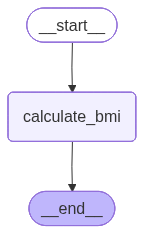

In [18]:
Image(workflow.get_graph().draw_mermaid_png())